# __Hashtags Validation__

In [1]:
import pandas as pd
from IPython.display import clear_output, display
import os, datetime
import numpy as np

In [2]:
DATA_PATH = 'data/tweets/'

week_list = [week_dir for week_dir in os.listdir(DATA_PATH) if os.path.isdir(DATA_PATH+week_dir) and not week_dir.endswith('.ipynb_checkpoints')]
print('Amount of extracted weeks: ', len(week_list))

Amount of extracted weeks:  26


In [3]:
week_list.sort()
week_list.remove('week_pr_01')
week_list.insert(week_list.index('week_12')+1, 'week_pr_01')
week_list.remove('week_pr_02')
week_list.insert(week_list.index('week_pr_01')+1, 'week_pr_02')
week_list.remove('week_pr_03')
week_list.insert(week_list.index('week_17')+1, 'week_pr_03')
week_list.remove('week_pr_04')
week_list.insert(week_list.index('week_21')+1, 'week_pr_04')

print(week_list)

['week_01', 'week_02', 'week_03', 'week_04', 'week_05', 'week_06', 'week_07', 'week_08', 'week_09', 'week_10', 'week_11', 'week_12', 'week_pr_01', 'week_pr_02', 'week_13', 'week_14', 'week_15', 'week_16', 'week_17', 'week_pr_03', 'week_18', 'week_19', 'week_20', 'week_21', 'week_pr_04', 'week_22']


In [4]:
user_list = []
hashtag_list = []

In [5]:
for week in week_list:
    clear_output(wait=True)
    print(f'Starting {week}:')
    week_df = pd.read_parquet(f'{DATA_PATH+week}/merged_{week}.parquet')
    for idx, tweet in week_df.iterrows():
        usr_name = eval(tweet['user'])['username']
        hashtags = eval(tweet['hashtags'])
        if usr_name not in user_list:
            user_list.append(usr_name)
        if hashtags:
            for hashtag in hashtags:
                hashtag_list.append(hashtag.lower())
                #hasht_low = hashtag.lower()
                #if hasht_low not in hashtag_list:
                #    hashtag_list.append(hasht_low)
    print(f'''
    Finished {week}:
    Total number of users: {len(user_list)}
    Total number of hashtags: {len(hashtag_list)}
    \n
    ''')

Starting week_22:

    Finished week_22:
    Total number of users: 472852
    Total number of hashtags: 5189068
    

    


In [6]:
user_series = pd.Series(user_list)
hashtag_series = pd.Series(hashtag_list)

In [7]:
user_series.drop_duplicates(inplace=True)
len(user_series)

472852

In [8]:
user_series[:20]

0         Indignado72
1     EscutaZeNinguem
2       OSul_noticias
3          Alvesalces
4             guinody
5      ANA_PAULA_FONS
6         libolsonaro
7         Sandroka131
8           gomessamg
9           teddyfps1
10         thivagando
11    AndreaPorto2021
12          thetunnes
13    ngelomarchioll1
14     MarceloAOrtega
15     eriicksonsilva
16            Elmosol
17     sbsergiobastos
18         silviacbap
19     LuizzPatriotaa
dtype: object

In [9]:
hashtag_use_count = len(hashtag_series)
hashtag_use_count

5189068

In [31]:
#hashtag_series.value_counts()[:30]

s_counts_ = hashtag_series.value_counts()[:30]
s_perc_ = hashtag_series.value_counts(normalize=True)[:30]
print('Top 30 Hashtags')
for idx, val, perc in zip(s_counts_.index, s_counts_.values, s_perc_.values):
    print(f'#{idx}: {val} ({perc*100:.3f}%)')

Top 30 Hashtags
#cpidacovid: 609488 (11.746%)
#forabolsonaro: 595474 (11.476%)
#forabolsonarogenocida: 150814 (2.906%)
#cpidapandemia: 143894 (2.773%)
#renanvagabundo: 116162 (2.239%)
#cpidocirco: 111937 (2.157%)
#renansabiadetudo: 88980 (1.715%)
#29mforabolsonaro: 79676 (1.535%)
#euautorizopresidente: 79206 (1.526%)
#bolsonarogenocida: 57439 (1.107%)
#cpidotse: 56181 (1.083%)
#bolsonaropresidenteate2026: 55712 (1.074%)
#lulaladrao: 55328 (1.066%)
#3jforabolsonaro: 52604 (1.014%)
#barrosonacadeia: 51438 (0.991%)
#cpidogenocidio: 50534 (0.974%)
#euapoiovotoauditavel: 48931 (0.943%)
#covid19: 43422 (0.837%)
#cpidacovid19: 41100 (0.792%)
#aglobonaopresta: 39479 (0.761%)
#19jforabolsonaro: 38188 (0.736%)
#impeachmentbolsonarourgente: 36020 (0.694%)
#bolsonarovaicair: 34391 (0.663%)
#24jforabolsonaro: 33803 (0.651%)
#lulalivrebrasillivre: 33762 (0.651%)
#euapoiobolsonaro2022: 31651 (0.610%)
#brasil: 31304 (0.603%)
#votoimpressoauditavelja: 30653 (0.591%)
#brasilpelovotoauditavel: 29623 (0.5

In [11]:
top_30 = list(hashtag_series.value_counts()[:30].index)

In [12]:
user_hash = {}
for user in user_list:
    user_hash[user] = np.zeros(30, dtype=int)

In [13]:
for week in week_list:
    clear_output()
    print(f'Current week: {week}...')
    week_df = pd.read_parquet(f'{DATA_PATH+week}/merged_{week}.parquet')
    for idx, tweet in week_df.iterrows():
        hashtags = eval(tweet['hashtags'])
        if hashtags:
            usr_name = eval(tweet['user'])['username']
            for hashtag in hashtags:
                hashtag_lower = hashtag.lower()
                if hashtag_lower in top_30:
                    idx = top_30.index(hashtag_lower)
                    user_hash[usr_name][idx] = user_hash[usr_name][idx] + 1
    print(f'Finished week: {week}')
    

Current week: week_22...
Finished week: week_22


In [14]:
columns = ['user']+top_30
columns

['user',
 'cpidacovid',
 'forabolsonaro',
 'forabolsonarogenocida',
 'cpidapandemia',
 'renanvagabundo',
 'cpidocirco',
 'renansabiadetudo',
 '29mforabolsonaro',
 'euautorizopresidente',
 'bolsonarogenocida',
 'cpidotse',
 'bolsonaropresidenteate2026',
 'lulaladrao',
 '3jforabolsonaro',
 'barrosonacadeia',
 'cpidogenocidio',
 'euapoiovotoauditavel',
 'covid19',
 'cpidacovid19',
 'aglobonaopresta',
 '19jforabolsonaro',
 'impeachmentbolsonarourgente',
 'bolsonarovaicair',
 '24jforabolsonaro',
 'lulalivrebrasillivre',
 'euapoiobolsonaro2022',
 'brasil',
 'votoimpressoauditavelja',
 'brasilpelovotoauditavel',
 'dia07vaisergigante']

In [15]:
user_hash_matrix = []

for key in list(user_hash.keys()):
    user_h = [key]+list(user_hash[key])
    user_hash_matrix.append(user_h)


In [16]:
usr_hash_df = pd.DataFrame(columns=columns, data=user_hash_matrix)

In [17]:
usr_hash_df.shape

(472852, 31)

In [18]:
usr_hash_df.head()

,user,cpidacovid,forabolsonaro,forabolsonarogenocida,cpidapandemia,renanvagabundo,cpidocirco,renansabiadetudo,29mforabolsonaro,euautorizopresidente,...,19jforabolsonaro,impeachmentbolsonarourgente,bolsonarovaicair,24jforabolsonaro,lulalivrebrasillivre,euapoiobolsonaro2022,brasil,votoimpressoauditavelja,brasilpelovotoauditavel,dia07vaisergigante
0,Indignado72,16,34,13,3,0,0,0,0,0,...,1,0,2,2,0,0,8,0,0,0
1,EscutaZeNinguem,9,12,6,2,0,0,0,6,0,...,0,2,0,0,0,0,0,0,0,0
2,OSul_noticias,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,15,0,0,0
3,Alvesalces,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,guinody,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
usr_hash_df.to_parquet('data/user_hashtag_matrix.parquet', index=False)

In [25]:
# neutral hashtags sets
cpidacovid = set(usr_hash_df[usr_hash_df['cpidacovid']!=0]['user'])
cpidapandemia = set(usr_hash_df[usr_hash_df['cpidapandemia']!=0]['user'])
covid19 = set(usr_hash_df[usr_hash_df['covid19']!=0]['user'])
cpidacovid19 = set(usr_hash_df[usr_hash_df['cpidacovid19']!=0]['user'])
brasil = set(usr_hash_df[usr_hash_df['brasil']!=0]['user'])

# pro government hashtags sets
renanvagabundo = set(usr_hash_df[usr_hash_df['renanvagabundo']!=0]['user'])
cpidocirco = set(usr_hash_df[usr_hash_df['cpidocirco']!=0]['user'])
renansabiadetudo = set(usr_hash_df[usr_hash_df['renansabiadetudo']!=0]['user'])
euautorizopresidente = set(usr_hash_df[usr_hash_df['euautorizopresidente']!=0]['user'])
cpidotse = set(usr_hash_df[usr_hash_df['cpidotse']!=0]['user'])
bolsonaropresidenteate2026 = set(usr_hash_df[usr_hash_df['bolsonaropresidenteate2026']!=0]['user'])

# against government hashtags sets
forabolsonaro = set(usr_hash_df[usr_hash_df['forabolsonaro']!=0]['user'])
forabolsonarogenocida = set(usr_hash_df[usr_hash_df['forabolsonarogenocida']!=0]['user'])
_29mforabolsonaro = set(usr_hash_df[usr_hash_df['29mforabolsonaro']!=0]['user'])
bolsonarogenocida = set(usr_hash_df[usr_hash_df['bolsonarogenocida']!=0]['user'])
_3jforabolsonaro = set(usr_hash_df[usr_hash_df['3jforabolsonaro']!=0]['user'])
cpidogenocidio = set(usr_hash_df[usr_hash_df['cpidogenocidio']!=0]['user'])

In [26]:
print(f'''
Neutral Hashtags

#cpidacovid: {len(cpidacovid)}
#cpidapandemia: {len(cpidapandemia)}
#covid19: {len(covid19)}
#cpidacovid19: {len(cpidacovid19)}
#brasil: {len(brasil)}

Pro Government Hashtags

#renanvagabundo: {len(renanvagabundo)}
#cpidocirco: {len(cpidocirco)}
#renansabiadetudo: {len(renansabiadetudo)}
#euautorizopresidente: {len(euautorizopresidente)}
#cpidotse: {len(cpidotse)}
#bolsonaropresidenteate2026: {len(bolsonaropresidenteate2026)}

Against Government Hastags

#forabolsonaro: {len(forabolsonaro)}
#forabolsonarogenocida: {len(forabolsonarogenocida)}
#29mforabolsonaro: {len(_29mforabolsonaro)}
#bolsonarogenocida: {len(bolsonarogenocida)}
#3jforabolsonaro: {len(_3jforabolsonaro)}
#cpidogenocidio: {len(cpidogenocidio)}
''')


Neutral Hashtags

#cpidacovid: 65393
#cpidapandemia: 26237
#covid19: 11977
#cpidacovid19: 14112
#brasil: 9763

Pro Government Hashtags

#renanvagabundo: 29442
#cpidocirco: 19793
#renansabiadetudo: 21500
#euautorizopresidente: 19512
#cpidotse: 16479
#bolsonaropresidenteate2026: 15289

Against Government Hastags

#forabolsonaro: 180706
#forabolsonarogenocida: 55246
#29mforabolsonaro: 35944
#bolsonarogenocida: 20322
#3jforabolsonaro: 13732
#cpidogenocidio: 11866



In [37]:
def percentage(part, whole):
  percentage = 100 * float(part)/float(whole)
  return f'{percentage:.3f}%'

In [55]:
print(f'''
Neutral
#cpidacovid ({len(cpidacovid)}) x #covid19 ({len(covid19)}): {len(cpidacovid.intersection(covid19))}  ({percentage(len(cpidacovid.intersection(covid19)), len(cpidacovid))} - {percentage(len(cpidacovid.intersection(covid19)), len(covid19))})
#cpidacovid ({len(cpidacovid)}) x #cpidapandemia ({len(cpidapandemia)}): {len(cpidacovid.intersection(cpidapandemia))} ({percentage(len(cpidacovid.intersection(cpidapandemia)), len(cpidacovid))} - {percentage(len(cpidacovid.intersection(cpidapandemia)), len(cpidapandemia))})
#cpidacovid ({len(cpidacovid)}) x #brasil ({len(brasil)}): {len(cpidacovid.intersection(brasil))} ({percentage(len(cpidacovid.intersection(brasil)), len(cpidacovid))} - {percentage(len(cpidacovid.intersection(brasil)), len(brasil))})

Against CPI
#cpidocirco ({len(cpidocirco)}) x #renanvagabundo ({len(renanvagabundo)}): {len(cpidocirco.intersection(renanvagabundo))} ({percentage(len(cpidocirco.intersection(renanvagabundo)), len(cpidocirco))} - {percentage(len(cpidocirco.intersection(renanvagabundo)), len(renanvagabundo))})
#cpidocirco ({len(cpidocirco)}) x #renansabiadetudo ({len(renansabiadetudo)}): {len(cpidocirco.intersection(renansabiadetudo))} ({percentage(len(cpidocirco.intersection(renansabiadetudo)), len(cpidocirco))} - {percentage(len(cpidocirco.intersection(renansabiadetudo)), len(renansabiadetudo))})
#cpidocirco ({len(cpidocirco)}) x #euautorizopresidente ({len(euautorizopresidente)}): {len(cpidocirco.intersection(euautorizopresidente))} ({percentage(len(cpidocirco.intersection(euautorizopresidente)), len(cpidocirco))} - {percentage(len(cpidocirco.intersection(euautorizopresidente)), len(euautorizopresidente))})
#cpidocirco ({len(cpidocirco)}) x #bolsonaropresidenteate2026 ({len(bolsonaropresidenteate2026)}): {len(cpidocirco.intersection(bolsonaropresidenteate2026))} ({percentage(len(cpidocirco.intersection(bolsonaropresidenteate2026)), len(cpidocirco))} - {percentage(len(cpidocirco.intersection(bolsonaropresidenteate2026)), len(bolsonaropresidenteate2026))})

Pro CPI
#forabolsonaro ({len(forabolsonaro)}) x #forabolsonarogenocida ({len(forabolsonarogenocida)}): {len(forabolsonaro.intersection(forabolsonarogenocida))} ({percentage(len(forabolsonaro.intersection(forabolsonarogenocida)), len(forabolsonaro))} - {percentage(len(forabolsonaro.intersection(forabolsonarogenocida)), len(forabolsonarogenocida))})
#forabolsonaro ({len(forabolsonaro)}) x #bolsonarogenocida ({len(bolsonarogenocida)}): {len(forabolsonaro.intersection(bolsonarogenocida))} {percentage(len(forabolsonaro.intersection(bolsonarogenocida)), len(forabolsonaro))} - {percentage(len(forabolsonaro.intersection(bolsonarogenocida)), len(bolsonarogenocida))})
#forabolsonaro ({len(forabolsonaro)}) x #cpidogenocidio ({len(cpidogenocidio)}): {len(forabolsonaro.intersection(cpidogenocidio))} ({percentage(len(forabolsonaro.intersection(cpidogenocidio)), len(forabolsonaro))} - {percentage(len(forabolsonaro.intersection(cpidogenocidio)), len(cpidogenocidio))})
#forabolsonarogenocida ({len(forabolsonarogenocida)}) x #bolsonarogenocida ({len(bolsonarogenocida)}): {len(forabolsonarogenocida.intersection(bolsonarogenocida))} ({percentage(len(forabolsonarogenocida.intersection(bolsonarogenocida)), len(forabolsonarogenocida))} - {percentage(len(forabolsonarogenocida.intersection(bolsonarogenocida)), len(bolsonarogenocida))})
''')


Neutral
#cpidacovid (65393) x #covid19 (11977): 3746  (5.728% - 31.277%)
#cpidacovid (65393) x #cpidapandemia (26237): 19461 (29.760% - 74.174%)
#cpidacovid (65393) x #brasil (9763): 2064 (3.156% - 21.141%)

Against CPI
#cpidocirco (19793) x #renanvagabundo (29442): 8780 (44.359% - 29.821%)
#cpidocirco (19793) x #renansabiadetudo (21500): 6252 (31.587% - 29.079%)
#cpidocirco (19793) x #euautorizopresidente (19512): 5099 (25.762% - 26.133%)
#cpidocirco (19793) x #bolsonaropresidenteate2026 (15289): 5414 (27.353% - 35.411%)

Pro CPI
#forabolsonaro (180706) x #forabolsonarogenocida (55246): 37506 (20.755% - 67.889%)
#forabolsonaro (180706) x #bolsonarogenocida (20322): 14785 8.182% - 72.754%)
#forabolsonaro (180706) x #cpidogenocidio (11866): 7248 (4.011% - 61.082%)
#forabolsonarogenocida (55246) x #bolsonarogenocida (20322): 8583 (15.536% - 42.235%)



In [28]:
print(f'''
Pro x Against
#forabolsonaro ({len(forabolsonaro)}) x #cpidocirco ({len(cpidocirco)}): {len(forabolsonaro.intersection(cpidocirco))}
#forabolsonaro ({len(forabolsonaro)}) x #renanvagabundo ({len(cpidocirco)}): {len(forabolsonaro.intersection(renanvagabundo))}
#forabolsonaro ({len(forabolsonaro)}) x #euautorizopresidente ({len(euautorizopresidente)}): {len(forabolsonaro.intersection(euautorizopresidente))}
#bolsonarogenocida ({len(bolsonarogenocida)}) x #cpidocirco ({len(cpidocirco)}): {len(bolsonarogenocida.intersection(cpidocirco))}
#bolsonarogenocida ({len(bolsonarogenocida)}) x #renanvagabundo({len(renanvagabundo)}): {len(bolsonarogenocida.intersection(renanvagabundo))}
#cpidogenocidio ({len(cpidogenocidio)}) x #cpidocirco({len(cpidocirco)}): {len(cpidogenocidio.intersection(cpidocirco))}
''')


Pro x Against
#forabolsonaro (180706) x #cpidocirco (19793): 1189
#forabolsonaro (180706) x #renanvagabundo (19793): 546
#forabolsonaro (180706) x #euautorizopresidente (19512): 1199
#bolsonarogenocida (20322) x #cpidocirco (19793): 449
#bolsonarogenocida (20322) x #renanvagabundo(29442): 156
#cpidogenocidio (11866) x #cpidocirco(19793): 883



In [29]:
print(f'''
Neutral x Against and Pro
#cpidacovid ({len(cpidacovid)}) x #cpidogenocidio ({len(cpidogenocidio)}): {len(cpidacovid.intersection(cpidogenocidio))}
#cpidacovid ({len(cpidacovid)}) x #cpidocirco ({len(cpidocirco)}): {len(cpidacovid.intersection(cpidocirco))}
#brasil ({len(brasil)}) x #forabolsonaro ({len(forabolsonaro)}): {len(brasil.intersection(forabolsonaro))}
#brasil ({len(brasil)}) x #cpidocirco ({len(cpidocirco)}): {len(brasil.intersection(cpidocirco))}
#covid19 ({len(covid19)}) x #forabolsonaro ({len(forabolsonaro)}): {len(covid19.intersection(forabolsonaro))}
#covid19 ({len(covid19)}) x #cpidocirco ({len(cpidocirco)}): {len(covid19.intersection(cpidocirco))}
''')


Neutral x Against and Pro
#cpidacovid (65393) x #cpidogenocidio (11866): 9540
#cpidacovid (65393) x #cpidocirco (19793): 4437
#brasil (9763) x #forabolsonaro (180706): 2574
#brasil (9763) x #cpidocirco (19793): 640
#covid19 (11977) x #forabolsonaro (180706): 3692
#covid19 (11977) x #cpidocirco (19793): 666



## __User hashtag usage__

In [46]:
import pandas as pd
import matplotlib as pl

In [3]:
df = pd.read_parquet('data/user_hashtag_matrix.parquet')
df.shape

(472852, 31)

In [4]:
neutral_hashtags = ['cpidacovid', 'cpidapandemia', 'covid19', 'cpidacovid19']
agt_cpi_hashtags = ['renanvagabundo', 'cpidocirco', 'renansabiadetudo', 'euautorizopresidente']
pro_cpi_hashtags = ['forabolsonaro', 'forabolsonarogenocida', 'bolsonarogenocida', 'cpidogenocidio']
selected_hashtags = neutral_hashtags+agt_cpi_hashtags+pro_cpi_hashtags
print(selected_hashtags)

['cpidacovid', 'cpidapandemia', 'covid19', 'cpidacovid19', 'renanvagabundo', 'cpidocirco', 'renansabiadetudo', 'euautorizopresidente', 'forabolsonaro', 'forabolsonarogenocida', 'bolsonarogenocida', 'cpidogenocidio']


In [64]:
selected_df = df[['user']+selected_hashtags]
selected_df.sample(5)

,user,cpidacovid,cpidapandemia,covid19,cpidacovid19,renanvagabundo,cpidocirco,renansabiadetudo,euautorizopresidente,forabolsonaro,forabolsonarogenocida,bolsonarogenocida,cpidogenocidio
179495,tsunamisantiago,0,0,0,0,0,0,0,0,1,0,0,0
297586,pietrin_do_sus,0,0,0,0,0,0,0,0,0,0,0,0
382133,alexandreataide,0,0,0,0,0,0,0,0,0,0,0,0
343637,antunesfsilva,0,0,0,0,0,0,0,0,1,0,0,0
147863,Jevelosoo,0,0,0,0,0,0,0,0,0,0,0,0


In [65]:
ht_sum = []
for idx, row in selected_df.iterrows():
    ht_sum.append(sum(row[selected_hashtags].values))

In [66]:
selected_df['hashtag_usage_amount'] = pd.Series(ht_sum)

/tmp/ipykernel_116572/2120302817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['hashtag_usage_amount'] = pd.Series(ht_sum)


In [67]:
selected_df.sample()

,user,cpidacovid,cpidapandemia,covid19,cpidacovid19,renanvagabundo,cpidocirco,renansabiadetudo,euautorizopresidente,forabolsonaro,forabolsonarogenocida,bolsonarogenocida,cpidogenocidio,hashtag_usage_amount
212066,cosImbraindead,0,0,0,0,0,0,0,0,2,0,0,0,2


In [68]:
selected_df = selected_df[selected_df['hashtag_usage_amount']!=0]
selected_df.shape

(301465, 14)

In [69]:
selected_df.sample(5)

,user,cpidacovid,cpidapandemia,covid19,cpidacovid19,renanvagabundo,cpidocirco,renansabiadetudo,euautorizopresidente,forabolsonaro,forabolsonarogenocida,bolsonarogenocida,cpidogenocidio,hashtag_usage_amount
107381,SamuelSNeto1,0,0,0,0,2,0,0,0,0,0,0,0,2
281658,Medesconfigurou,0,0,0,0,0,0,0,0,1,0,0,0,1
247627,nathalya_thomaz,0,0,0,0,0,0,0,0,1,0,0,0,1
53802,sauloquevedo,20,1,0,0,0,0,0,0,0,0,0,0,21
254316,imlyvia,2,0,0,0,0,0,0,0,3,0,0,0,5


In [70]:
selected_df['hashtag_usage_amount'].max()

29571

In [71]:
selected_df[selected_df['hashtag_usage_amount']==29571]

,user,cpidacovid,cpidapandemia,covid19,cpidacovid19,renanvagabundo,cpidocirco,renansabiadetudo,euautorizopresidente,forabolsonaro,forabolsonarogenocida,bolsonarogenocida,cpidogenocidio,hashtag_usage_amount
30,ptribeirao,12272,1,0,0,0,0,0,0,13793,3505,0,0,29571


In [72]:
selected_df[selected_df['hashtag_usage_amount']>500]

,user,cpidacovid,cpidapandemia,covid19,cpidacovid19,renanvagabundo,cpidocirco,renansabiadetudo,euautorizopresidente,forabolsonaro,forabolsonarogenocida,bolsonarogenocida,cpidogenocidio,hashtag_usage_amount
30,ptribeirao,12272,1,0,0,0,0,0,0,13793,3505,0,0,29571
71,MarivoneLula,637,7,1,2,0,0,0,1,69,59,145,31,952
95,tppereir,100,7,2,1,0,0,0,0,128,40,307,2,587
126,eliel_almeida,193,89,52,20,0,0,0,1,75,102,79,22,633
147,_gabge,188,14,371,0,0,0,0,0,0,0,0,0,573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279053,crocogay,561,0,0,0,0,0,0,0,1,0,0,0,562
292484,fabianadirce,260,0,0,36,0,0,0,0,290,3,0,0,589
317800,desbocadadobar,489,81,0,19,0,1,0,0,22,11,0,2,625
326320,matosra,0,0,0,0,0,0,0,0,918,2,0,0,920


In [74]:
selected_df = selected_df.reset_index().drop(["index"], axis=1)

In [76]:
neutral_amount = []
a_cpi_amount = []
p_cpi_amount = []

for idx, row in selected_df.iterrows():
    neutral_amount.append(sum(row[neutral_hashtags].values))
    a_cpi_amount.append(sum(row[agt_cpi_hashtags].values))
    p_cpi_amount.append(sum(row[pro_cpi_hashtags].values))

In [77]:
selected_df['neutral_amount'] = neutral_amount
selected_df['agnst_cpi_amount'] = a_cpi_amount
selected_df['pro_cpi_amount'] = p_cpi_amount

In [79]:
selected_df.sample(5)

,user,cpidacovid,cpidapandemia,covid19,cpidacovid19,renanvagabundo,cpidocirco,renansabiadetudo,euautorizopresidente,forabolsonaro,forabolsonarogenocida,bolsonarogenocida,cpidogenocidio,hashtag_usage_amount,neutral_amount,agnst_cpi_amount,pro_cpi_amount
117677,marivr_,2,1,0,0,0,0,0,0,1,0,0,0,4,3,0,1
66831,cacasds,4,0,0,0,0,0,0,0,0,0,0,0,4,4,0,0
187826,Mariama99770913,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
17447,betatrotta,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
6999,FabioAlexander_,9,8,12,7,21,36,7,13,0,0,0,0,113,36,77,0


In [83]:
prop_neutral = []
prop_agnst = []
prop_pro = []

for idx, row in selected_df.iterrows():
    prop_neutral.append(row['neutral_amount']/row['hashtag_usage_amount'])
    prop_agnst.append(row['agnst_cpi_amount']/row['hashtag_usage_amount'])
    prop_pro.append(row['pro_cpi_amount']/row['hashtag_usage_amount'])

In [84]:
selected_df['prop_neutral'] = prop_neutral
selected_df['prop_agnst'] = prop_agnst
selected_df['prop_pro'] = prop_pro

In [85]:
selected_df.sample(10)

,user,cpidacovid,cpidapandemia,covid19,cpidacovid19,renanvagabundo,cpidocirco,renansabiadetudo,euautorizopresidente,forabolsonaro,forabolsonarogenocida,bolsonarogenocida,cpidogenocidio,hashtag_usage_amount,neutral_amount,agnst_cpi_amount,pro_cpi_amount,prop_neutral,prop_agnst,prop_pro
208841,Ramalho9514,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0.000000,1.000000,0.000000
209072,CamargoGabriel1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0.000000,1.000000,0.000000
272518,thassycruz,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0.000000,0.000000,1.000000
53931,ACFavretto,0,0,0,0,0,0,0,0,9,0,0,0,9,0,0,9,0.000000,0.000000,1.000000
186478,Dalvania,0,0,0,0,0,0,0,0,2,1,1,0,4,0,0,4,0.000000,0.000000,1.000000
53358,Magnoo____,38,9,2,1,0,0,0,0,11,2,2,3,68,50,0,18,0.735294,0.000000,0.264706
44935,MorganaVLino,49,14,0,11,0,1,0,0,5,0,0,6,86,74,1,11,0.860465,0.011628,0.127907
16419,AFErroviaria,17,16,3,0,0,0,0,0,2,3,20,2,63,36,0,27,0.571429,0.000000,0.428571
226831,euamavxi,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0.000000,0.000000,1.000000
63615,domenica_mendes,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0.000000,0.000000,1.000000


<AxesSubplot:>

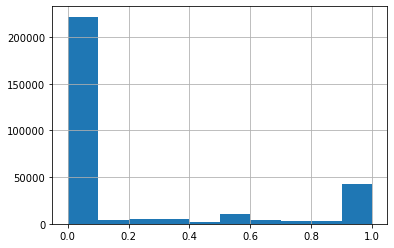

In [86]:
selected_df['prop_neutral'].hist()

<AxesSubplot:>

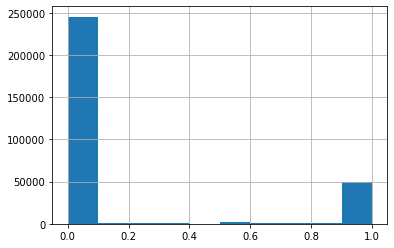

In [87]:
selected_df['prop_agnst'].hist()

<AxesSubplot:>

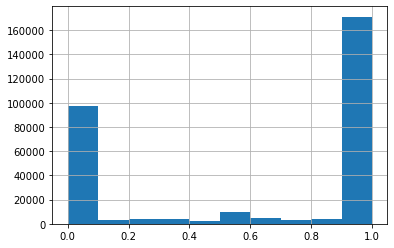

In [88]:
selected_df['prop_pro'].hist()